# Machine Learning Example Case: 
House Sale Price Prediction (like Zillow's "zestimate") 

When you see a line starting with "TASK", do that task!

### TASK: Click on the next cell and press shift-enter
You will get the code in it get executed.   
The result of last command or representation of last varible in that cell will be displayed 

In [75]:
import pandas as pd
housing = pd.read_csv('data/housing_processed.csv')
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,0,0,0,0,0,0,0,0,1


### Filtering Columns
Some columns were not removed when equivalent coded ones were created

In [76]:
housing[["ExterQual","ExterQual_Coded"]].head()

,ExterQual,ExterQual_Coded
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3


### Filtering in a series
dtypes returns a series   
filtering series and dataframes are similar

In [77]:
type(housing.dtypes==object)

pandas.core.series.Series

In [78]:
housing.dtypes[housing.dtypes==object]

ExterQual       object
ExterCond       object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
HeatingQC       object
CentralAir      object
KitchenQual     object
Functional      object
FireplaceQu     object
GarageFinish    object
GarageQual      object
GarageCond      object
PavedDrive      object
dtype: object

In [79]:
housing.dtypes[housing.dtypes==object].shape

(16,)

In [80]:
"SalePrice" in housing.columns 

True

### Removing Undesired Columns
In my case, my colleague had left above non-numeric columns in preprocessing, after creating corresponding coded versions

In [81]:
len(housing.columns)

238

In [82]:
# We could drop columns by name:
housing_ml = housing.drop(columns=["ExterQual"])

In [83]:
# or wholesale, keeping only numeric:
housing_ml = housing.loc[:,housing.dtypes != object]

In [84]:
len(housing_ml.columns)

222

# Separate Target into new Variable
- "SalePrice" is the target.    
 - The value we want to predict from other values (features) for a house.  
- Currently it is a column like the other features.   
- Scikit-learn needs 2 variables: features (X) and target (y) to be Predicted into its own 1-D array 

# NumPy
- Both Pandas and scikit-learn are build on top of NumPy
- scikit-learn can not directly work on dataframes
- X and y data type needs to be NumPy "ndarrays"

In [85]:
housing_ml.shape

(1460, 222)

In [86]:
# Split data as features and target
# take "SalePrice" values into its own 1-D array 
sale_price = housing_ml.pop('SalePrice')
type(sale_price)

pandas.core.series.Series

In [87]:
# pop removes the column
# "in place" operation
# now housing_ml has one less column
housing_ml.shape

(1460, 221)

In [88]:
y = sale_price.values
type(y)

numpy.ndarray

# See what other methods are available for ndarray

In [89]:
# press tab after putting cursor after dot "."
#y. #uncomment, press tab after . 

In [90]:
y.shape
# (1460,)
# it is equivalent to (1460)
# means it is a 1-d array

(1460,)

### TASK: get ndarray version of feature dataframe put it onto variable X

In [91]:
X = housing_ml.values

In [92]:
type(X)

numpy.ndarray

### TASK: check the shape of X

In [93]:
X.shape

(1460, 221)

### TASK: programmatically check if X and y has matching number of rows
You

In [94]:
X.shape[0] == y.shape[0]

True

# First Model
Q: What would you do if you had no features?

A: You would always estimatate the average house price.

We will have to do much better than that.  
We have so much data to base our decision on.   
It can still serve us as a baseline to compare.   
An inferior baseline could be: random in the range or max and min in training data. 

In [95]:
# Import estimator
from sklearn.dummy import DummyRegressor
# Instantiate estimator
# guess the mean every single time
mean_reg = DummyRegressor(strategy='mean')
# fit estimator
mean_reg.fit(X, y)

DummyRegressor()

In [96]:
# predict
mean_reg.predict(X)

array([180921.19589041, 180921.19589041, 180921.19589041, ...,
       180921.19589041, 180921.19589041, 180921.19589041])

## Evaluating The Model
scikit-learn regressors have a score function.   
It gives you how much better your model does compared to worst model
Technically: what percentage of the variance has decreased over the worst model

"Mean" *is* the worst model, so its score will be 0.

In [97]:
mean_reg.score(X, y)

0.0

## Fitting a linear model 
First, let's use only one feature 

In [98]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [99]:
X_lf = housing_ml[['LotFrontage']]

In [100]:
y.shape

(1460,)

In [101]:
linear_model.fit(X_lf, y)

LinearRegression()

Above, you see that it used defaults to create the estimator.   
You could google "LinearRegression sklearn" and find the documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
to see the options for the other parameters.

In [102]:
y_pred = linear_model.predict(X_lf)
y_pred

array([174831.54266015, 192951.57061432, 178455.54825099, ...,
       176039.54452376, 178455.54825099, 186911.56129626])

In [103]:
linear_model.score(X_lf, y)

0.11215612336205594

### Chart Showing the Linear Fit
matplotlib is the most common visualization library

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

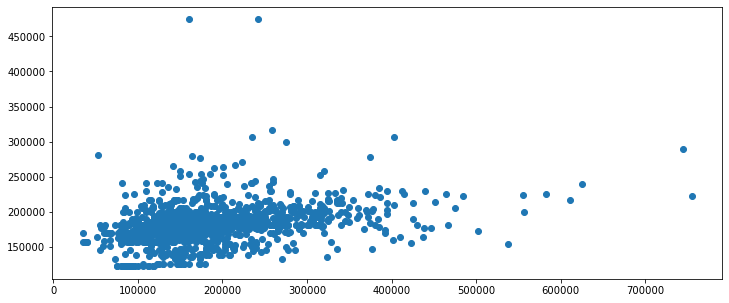

In [105]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred);

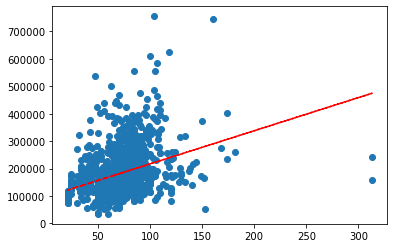

In [106]:
plt.scatter(X_lf,y)
plt.plot(X_lf,y_pred,'r--')

### TASK: add labels to these charts
search label:
https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py


### Task: try replacing scatter with plot
Do you see why scatter is needed for data rows.
Try also replacing plot with scatter. 

# Effect of using a Better predictor 
Ground Living Area should be better than Lot Frontage!

In [107]:
X_area = housing_ml[['GrLivArea']]

In [108]:
linear_model.fit(X_area, y)

LinearRegression()

Now the linear_model has another model in it

In [109]:
y_pred2 = linear_model.predict(X_area)
linear_model.score(X_area, y)

0.5021486502718042

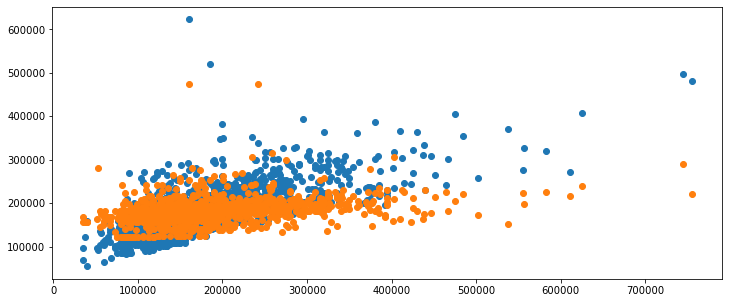

In [110]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred2); # blue obviously better
plt.scatter(y, y_pred); # orange

### TASK: add legend
which color is the prediction based on which feature

# Using all predictors!

In [111]:
# We had 81 columns (80 features) in original dataset,
# coded as 221 features!
X.shape

(1460, 221)

In [112]:
linear_model.fit(X, y)

LinearRegression()

In [113]:
y_pred3 = linear_model.predict(X)

In [114]:
linear_model.score(X, y)

0.9184728890914109

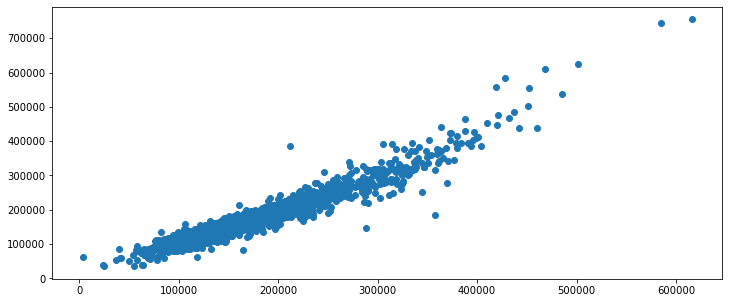

In [115]:
plt.figure(figsize=(12, 5))
plt.scatter(y_pred3, y);

In [116]:
linear_model.coef_

array([ 6.18730650e-01, -1.04768176e+02,  8.29146183e+01,  5.70113429e-01,
        8.28385534e+03,  5.37956249e+03,  2.61542429e+02,  6.79767709e+00,
        3.07700897e+01,  1.82055453e+01,  2.11371271e+00, -2.06696117e+00,
        1.82522947e+01,  1.21118297e+01,  3.05174581e+01, -5.95853742e+00,
        3.66706191e+01,  1.40735083e+03,  1.23864194e+03,  1.79626409e+03,
        2.39463247e+03, -6.07678357e+03, -1.42407520e+04,  2.54703836e+03,
        6.35612542e+03,  4.44639314e+03,  1.58862603e+01,  1.09631831e+01,
        9.95644567e+00, -2.10720815e-01,  3.73881861e+01,  3.44195133e+01,
        7.08491113e+01, -1.48854996e-01, -6.44244947e+02,  6.94848018e+01,
        5.04779013e+03, -3.15002255e+03,  3.70082269e+03, -6.21668470e+03,
        5.12167671e+03, -7.03540089e+01,  5.30653317e+02,  1.16318136e+03,
        6.08321003e+03,  5.57263290e+03, -1.73384353e+03,  1.10718757e+03,
        5.33148669e+03, -1.98950669e+03,  7.77190075e+01, -6.18020961e+02,
       -2.78890364e+03,  

In [117]:
linear_model.normalize

False

### Hint on how to train for models on individual features

In [124]:
predictor_variables= list(housing_ml.columns)

In [125]:
predictor_variables

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'ExterQual_Coded',
 'ExterCond_Coded',
 'BsmtQual_Coded',
 'BsmtCond_Coded',
 'BsmtExposure_Coded',
 'BsmtFinType1_Coded',
 'BsmtFinType2_Coded',
 'HeatingQC_Coded',
 'KitchenQual_Coded',
 'Functional_Coded',
 'FireplaceQu_Coded',
 'GarageFinish_Coded',
 'GarageQual_Coded',
 'GarageCond_Coded',
 'PavedDrive_Coded',
 'CentralAir_Coded',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleC

In [126]:
for i in range(0,3):
    print(i)

0
1
2


In [128]:
for i in range(0,3):
    linear_model.fit(housing_ml[[predictor_variables[i]]], sale_price)
    print(linear_model.score(housing_ml[[predictor_variables[i]]], sale_price))

0.00048034259116214173
0.007103815434038263
0.11215612336205594


### Hint on how to train for models on pairs of features

In [131]:
# if we had these indices as the top, and wanted pairs of them
top5=[50, 30, 21, 10, 11]
top5

[50, 30, 21, 10, 11]

In [132]:
import itertools as it

In [136]:
combinations = it.combinations(top5,2)

In [137]:
for i in combinations:
    print(i, type(i))

(50, 30) <class 'tuple'>
(50, 21) <class 'tuple'>
(50, 10) <class 'tuple'>
(50, 11) <class 'tuple'>
(30, 21) <class 'tuple'>
(30, 10) <class 'tuple'>
(30, 11) <class 'tuple'>
(21, 10) <class 'tuple'>
(21, 11) <class 'tuple'>
(10, 11) <class 'tuple'>
